In [1]:
cd ..

/home/sallinen/Programmation/predicting-poverty-through-time/src


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from lib import estimator_util as eu
from lib import clusters_utils as cl

from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from os import listdir
from os.path import isfile, join

In [4]:
sns.set_theme()

In [5]:
def cnn_osm2(complete, model_, country, display_plot=False, **params):
        tmp_df = complete.loc[complete.country == country]

        years = tmp_df.groupby(["year"]).groups.keys()
        year = max(years)
        recent_df_complete = tmp_df.loc[tmp_df.year == year]
        split_map = cl.split_k_sets(10, lat=recent_df_complete["lat"], lon=recent_df_complete["lon"])
        X, y = eu.get_recent_features(tmp_df, [country], all_cols)
        r2, y_real, y_predicted, trained_model = eu.run_model(X, y, model_, seed=1, kf= cl.folds_from_split(split_map), **params)
        fig = eu.plot_predictions(y_real, y_predicted, r2, country, year)
        fig.savefig(f"../figs/{country}_{year}_cnnosm_{model_.__name__}.pdf", dpi=600)
        return r2

/home/sallinen/Programmation/predicting-poverty-through-time/src/lib/estimator_util.py:142: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(5, 8))


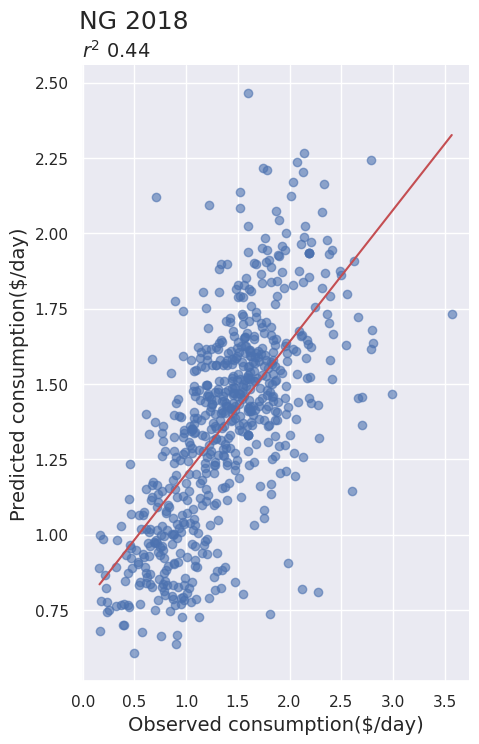

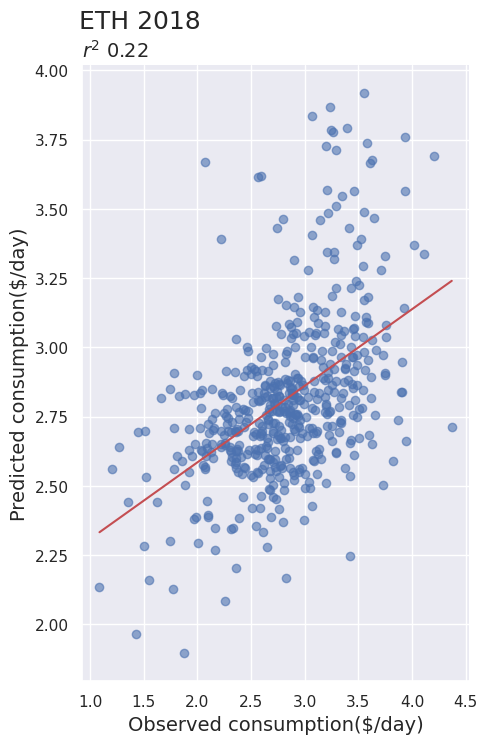

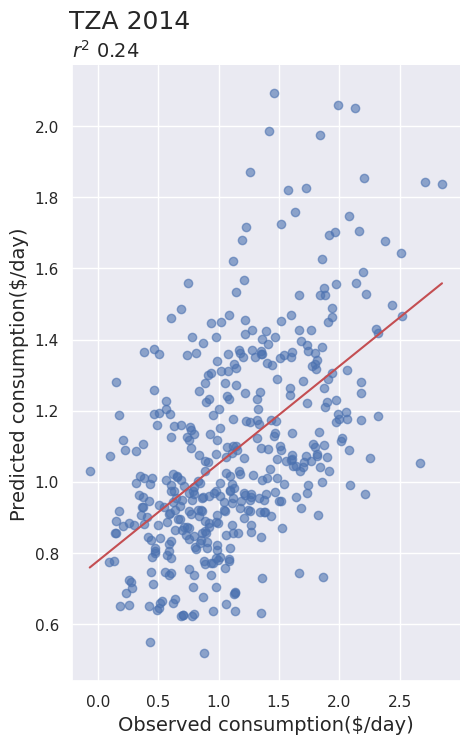

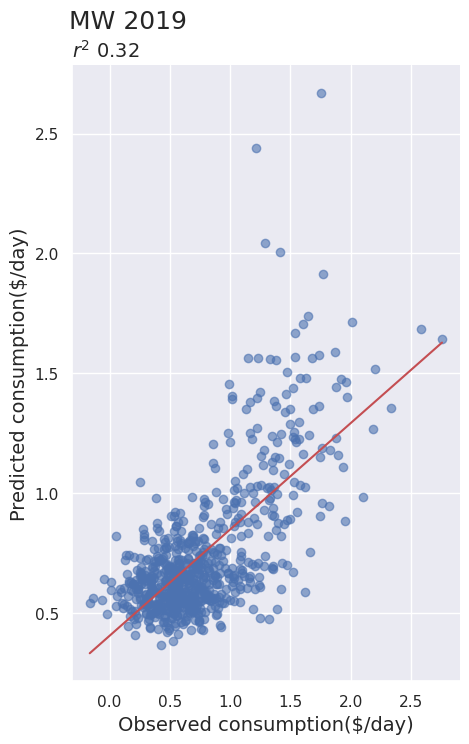

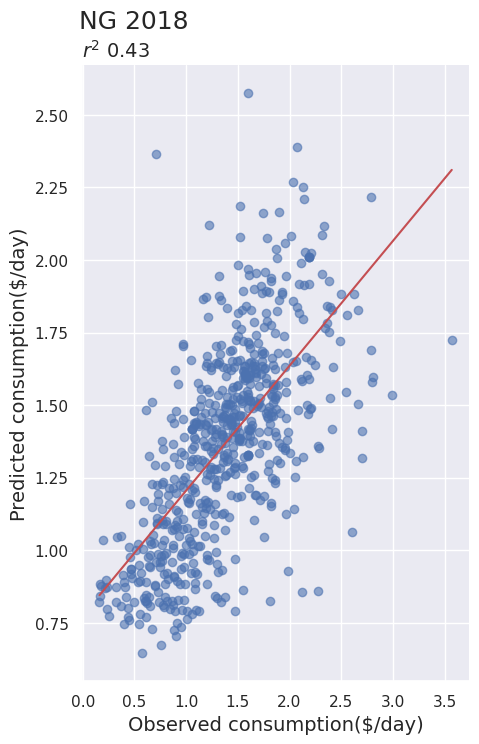

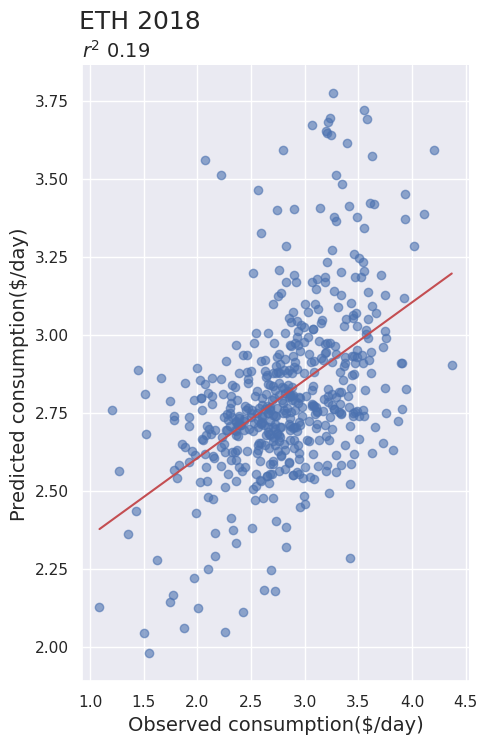

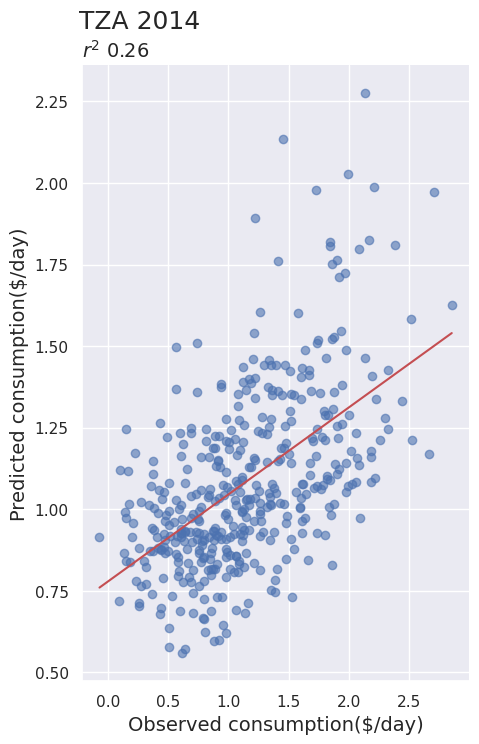

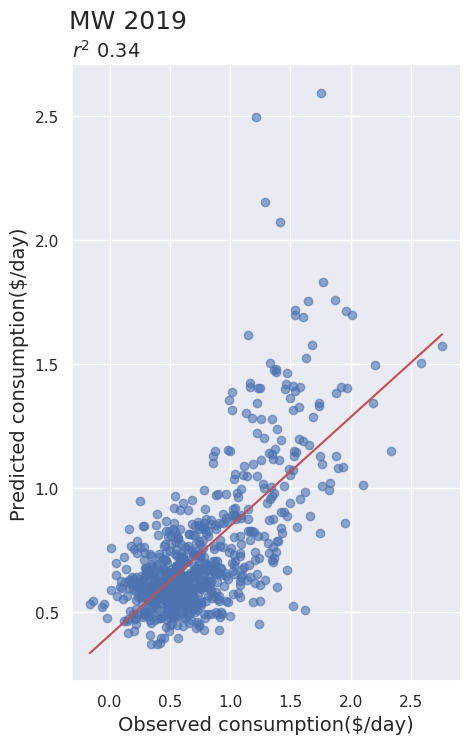

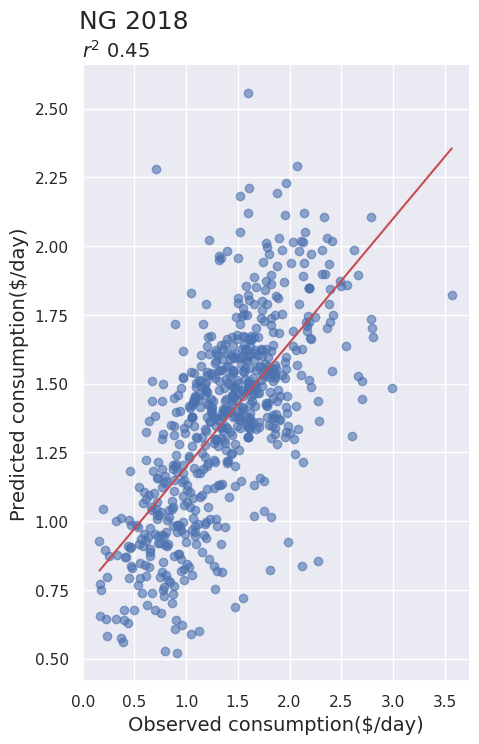

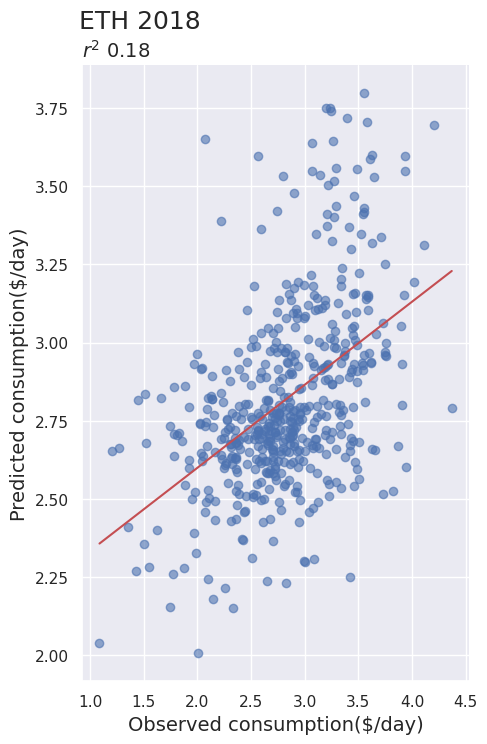

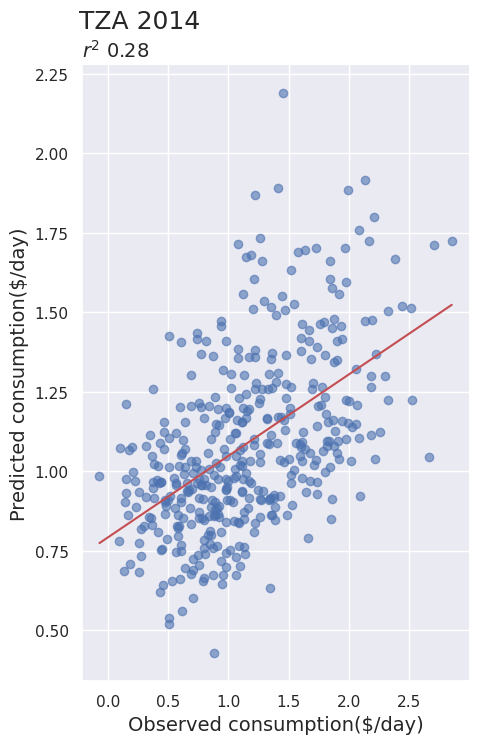

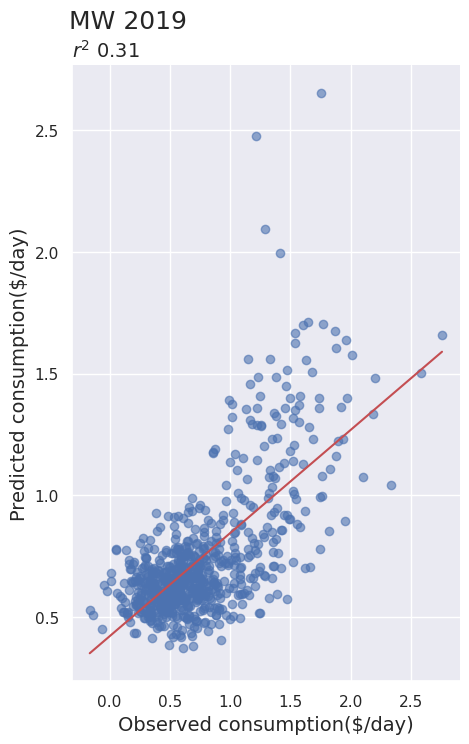

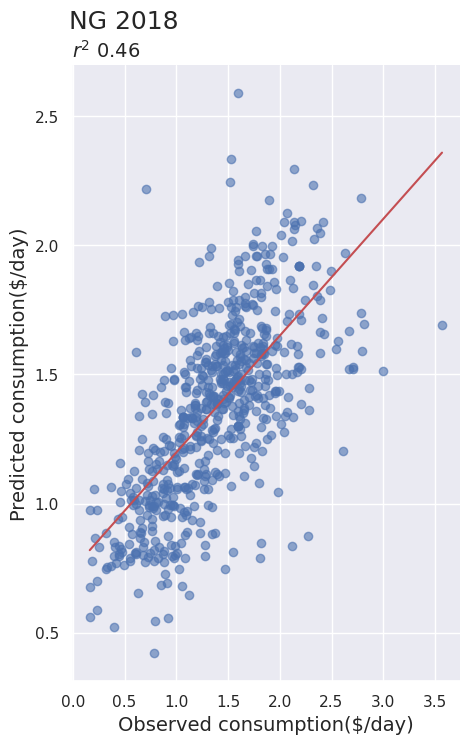

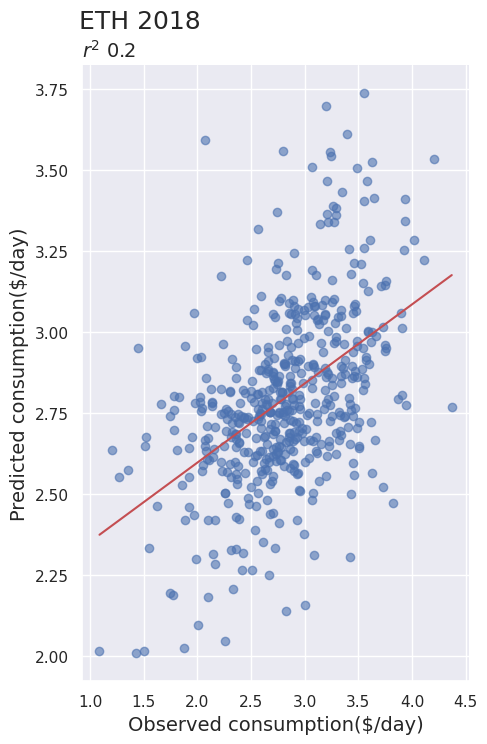

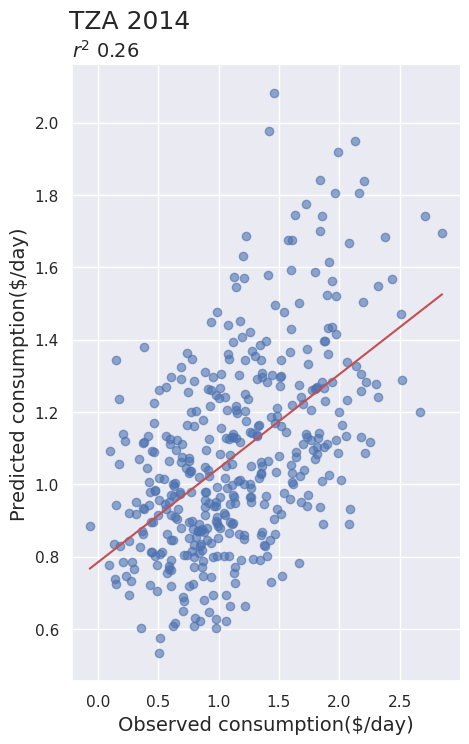

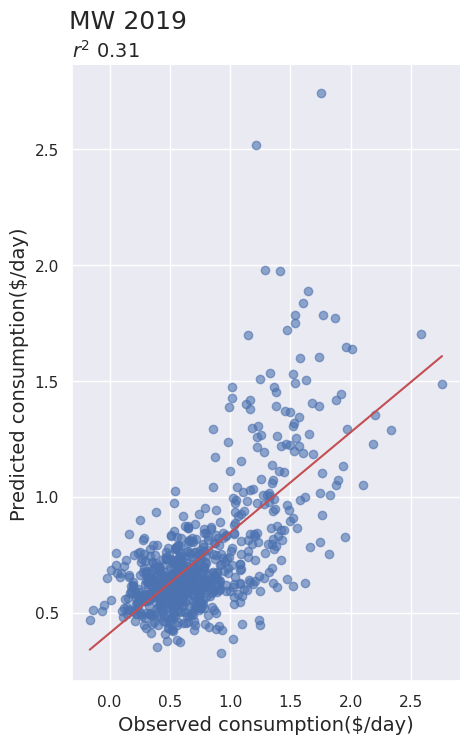

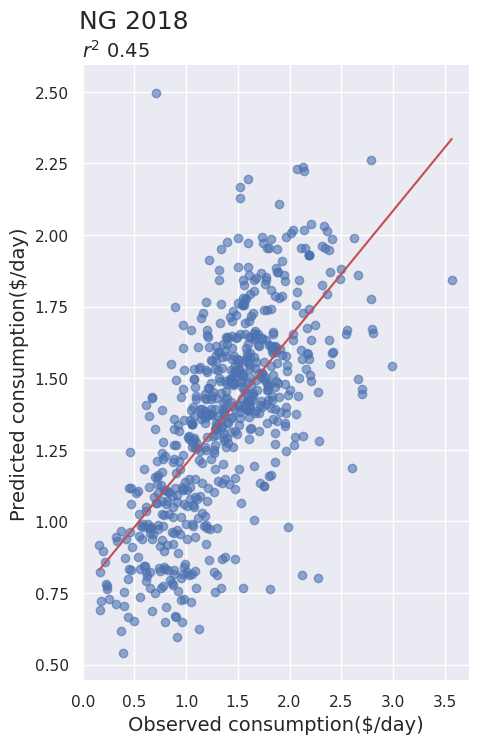

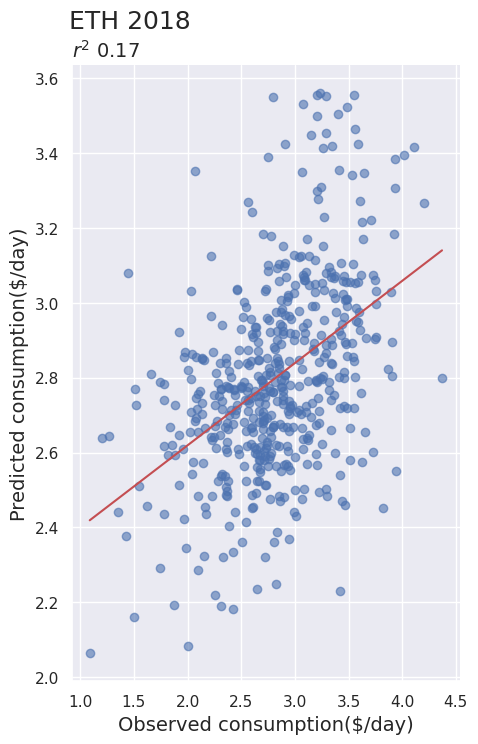

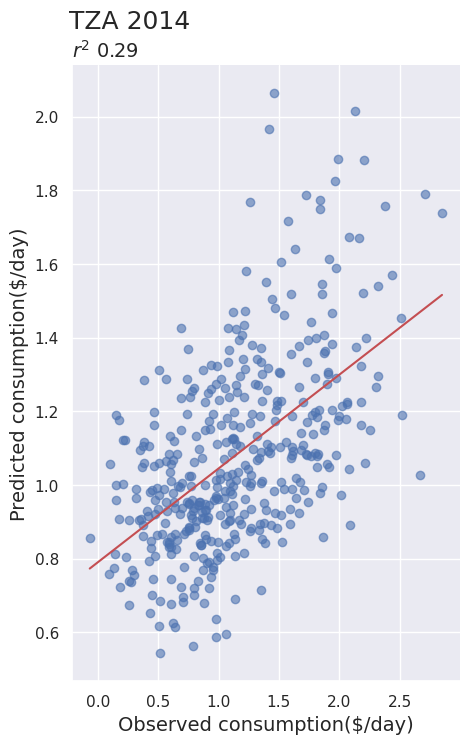

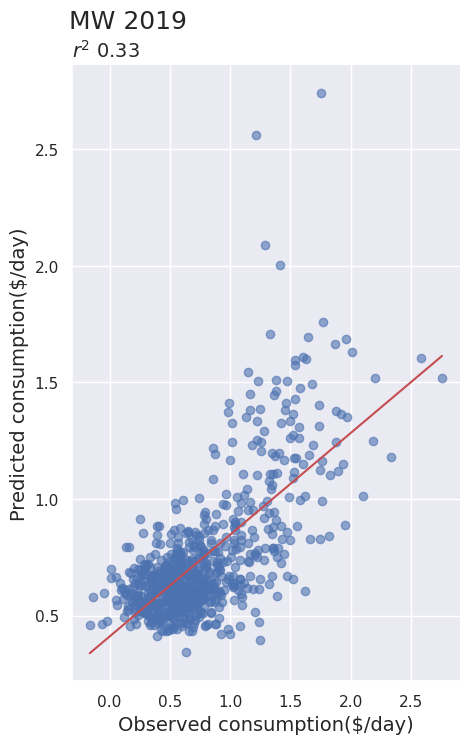

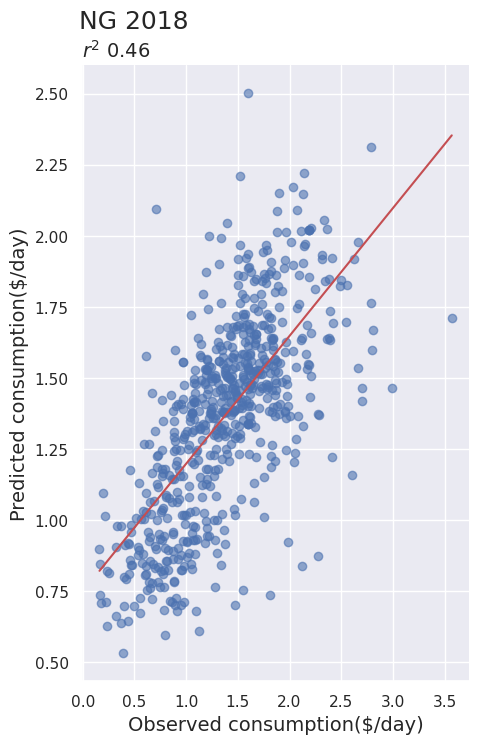

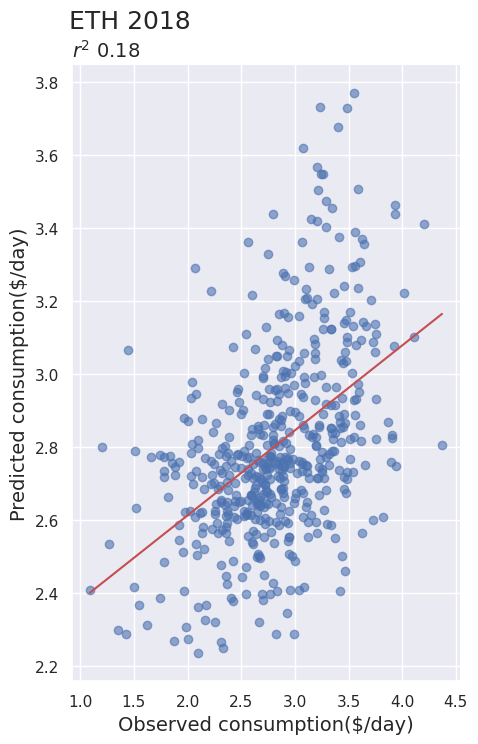

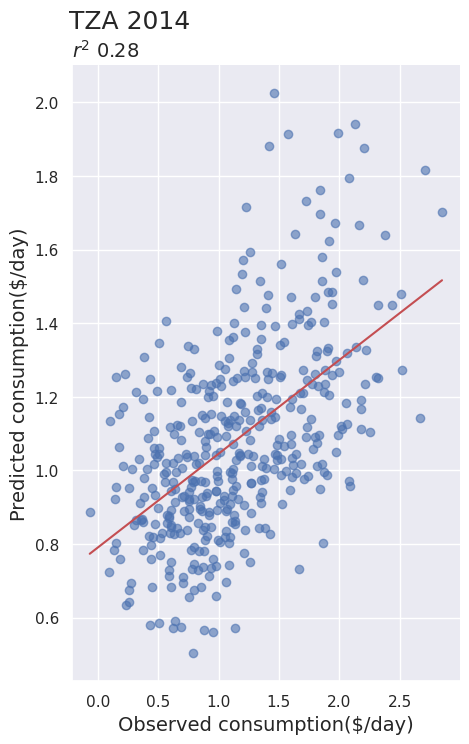

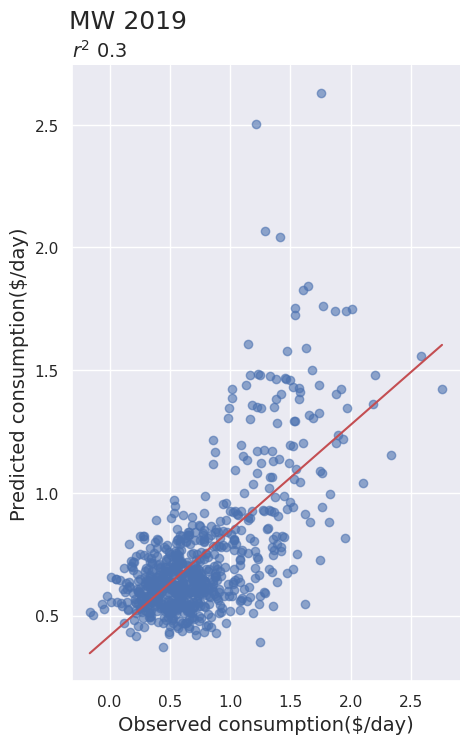

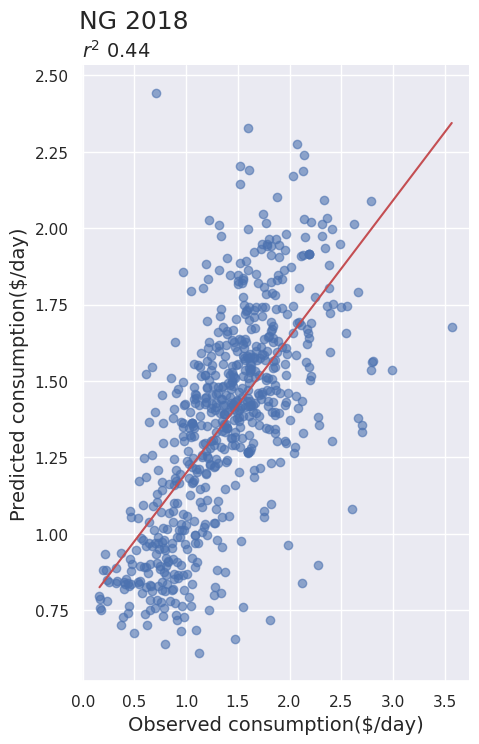

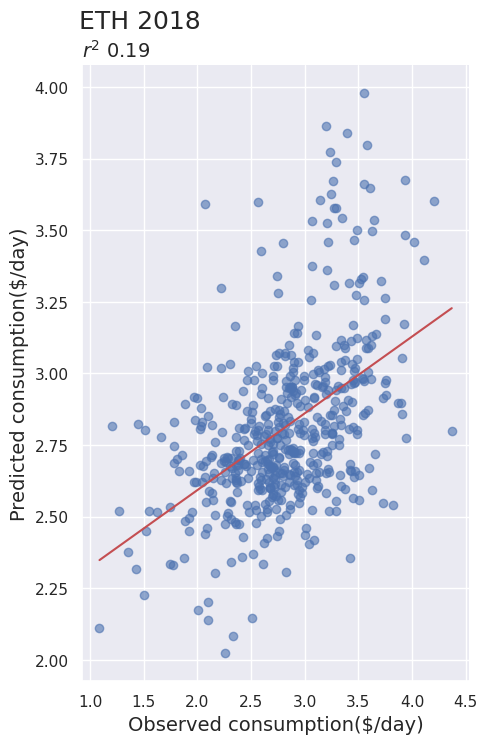

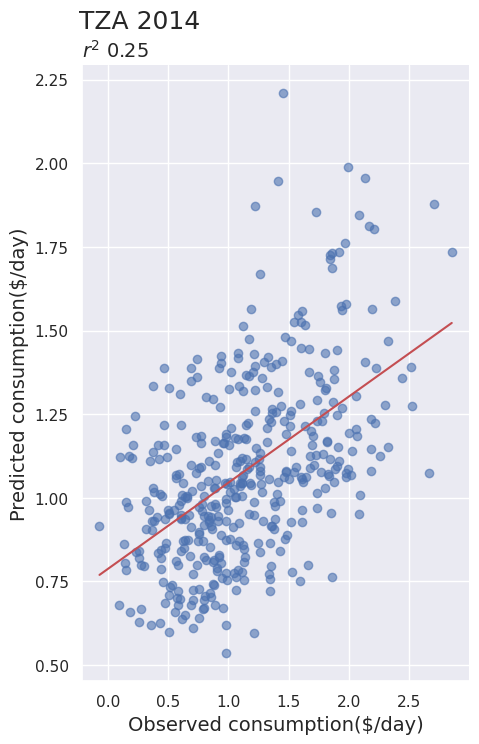

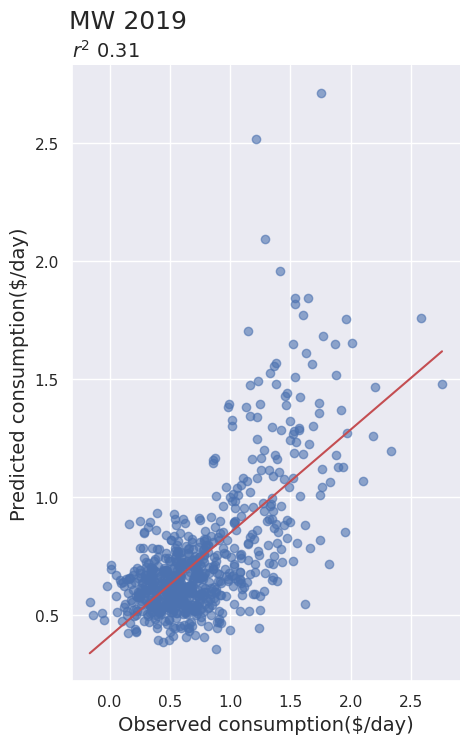

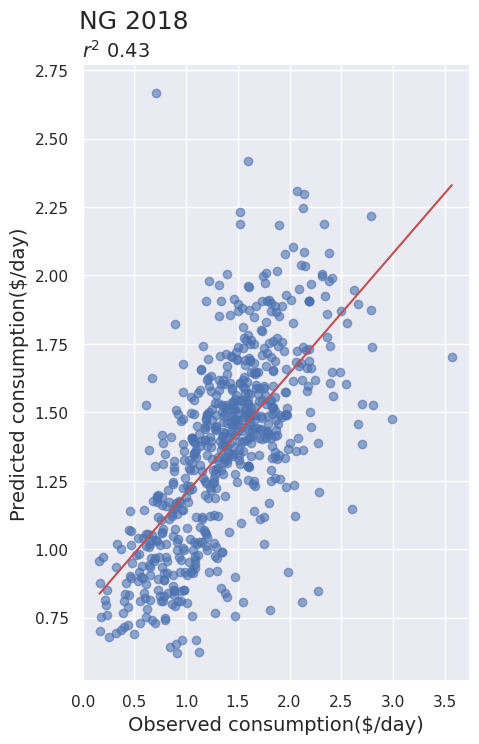

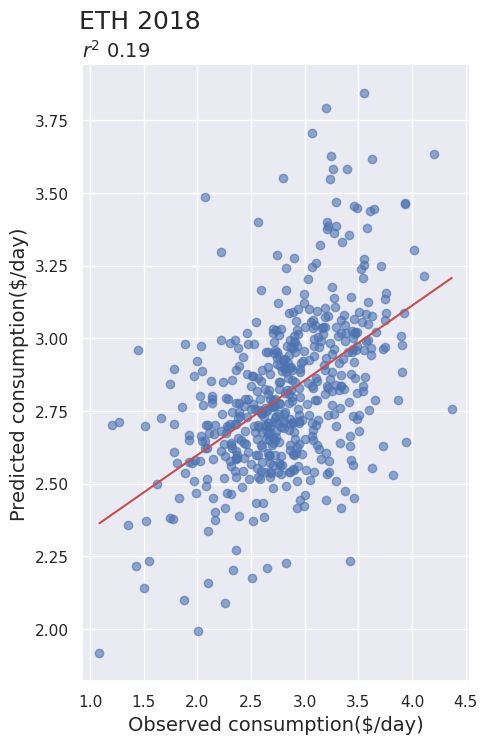

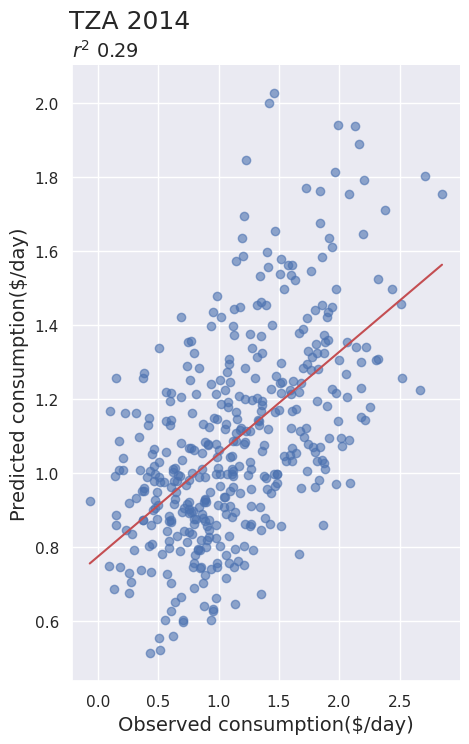

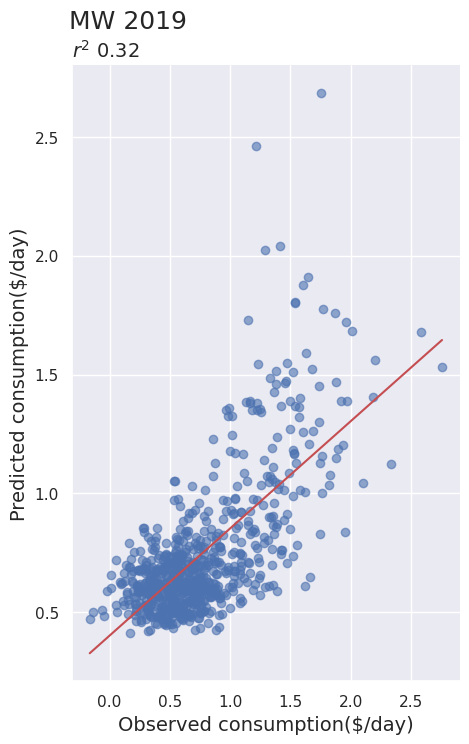

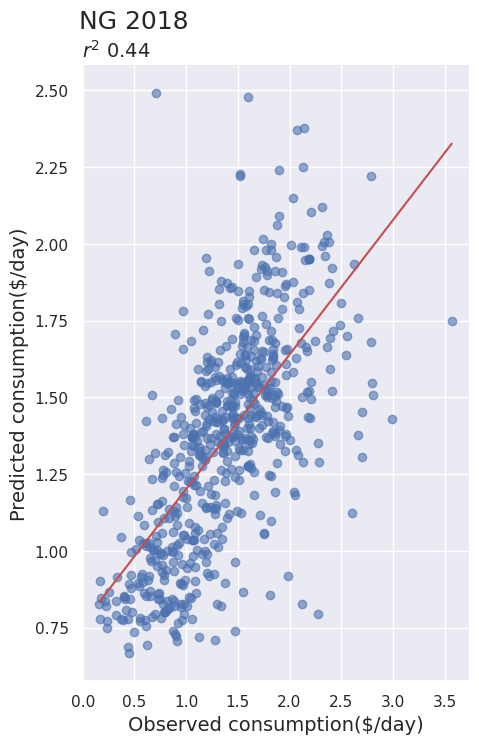

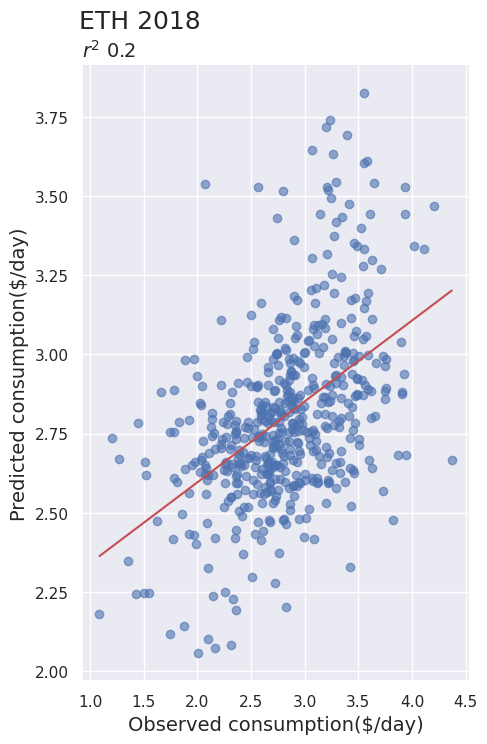

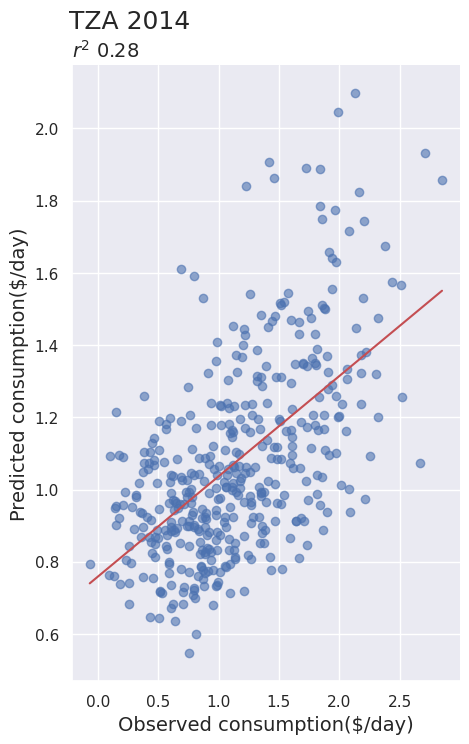

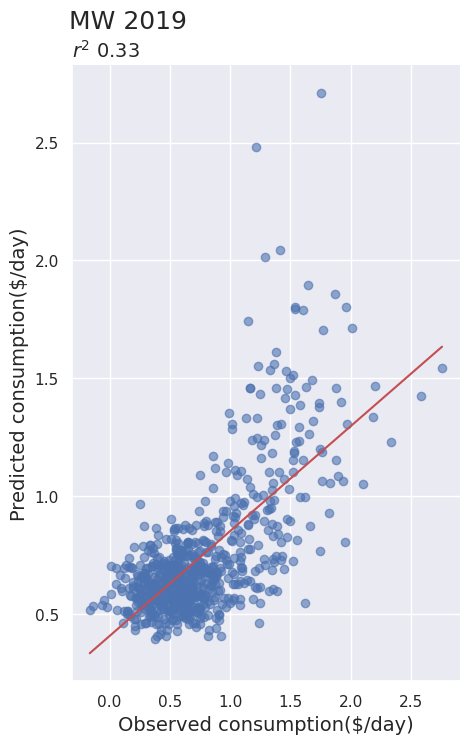

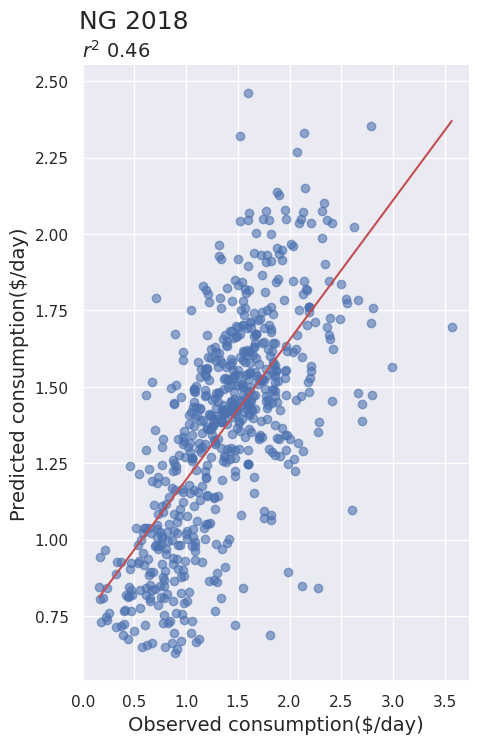

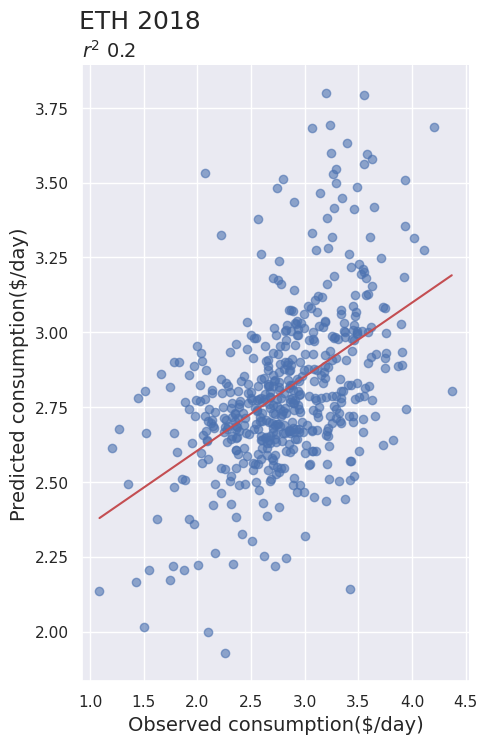

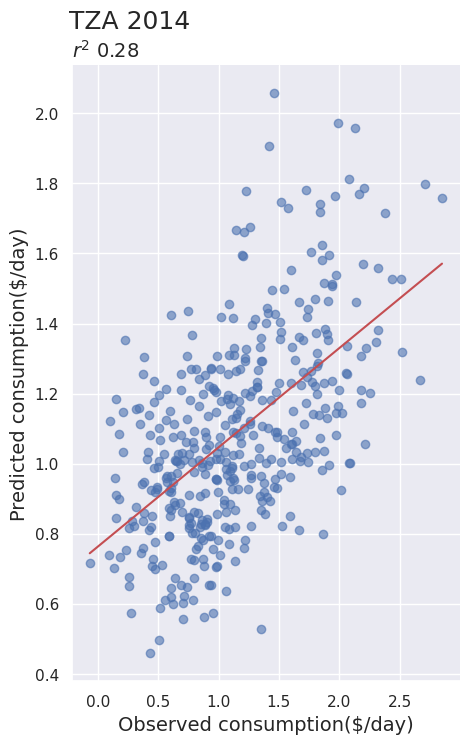

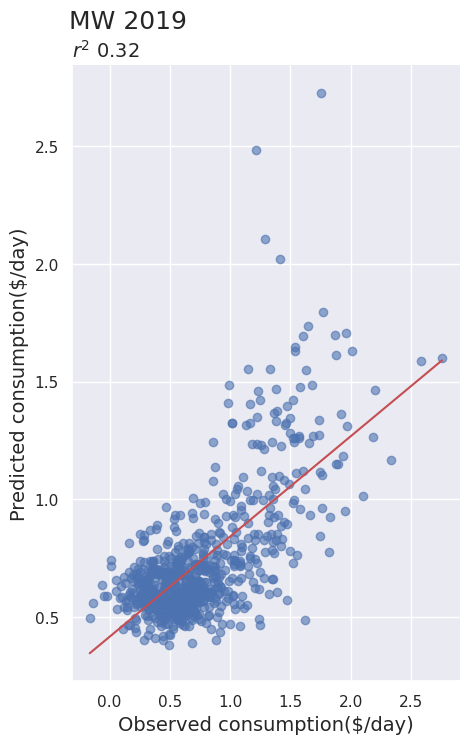

In [6]:
files = [f for f in listdir("../data/cnn_features/") if isfile(join("../data/cnn_features/", f))]
files = list(filter(lambda a: 'ncomp' in a, files))
countries = ["NG", "ETH" ,"TZA", "MW"]
r2 = np.zeros((len(files),len(countries)))
nb_cluster = []

for i, f in enumerate(files):
    complete_df, all_cols = eu.get_data("../data/lsms/processed/_all_real.csv", "../data/cnn_features/"+ f, "../data/")
    k = f[-6:-4].replace('_', '')
    nb_cluster.append(int(k))
    for j,country in enumerate(countries):
        r2[i,j] = cnn_osm2(complete_df, Ridge, country, alpha = 1000)

In [7]:
df = pd.DataFrame(r2, columns=countries)
df.insert(0, 'k', nb_cluster)
df = df.sort_values('k')
display(df)

k        NG       ETH       TZA        MW
1   3  0.430952  0.187343  0.259708  0.335507
7   5  0.434041  0.191954  0.291819  0.323280
5   7  0.457814  0.177601  0.275535  0.303508
0  10  0.442168  0.224722  0.240631  0.321150
6  14  0.444146  0.190852  0.250786  0.312719
9  20  0.458239  0.204259  0.279366  0.324431
8  29  0.436563  0.203716  0.280206  0.328914
4  42  0.454700  0.166235  0.286645  0.330152
3  61  0.457608  0.199349  0.260107  0.312245
2  87  0.452434  0.176062  0.279374  0.313520

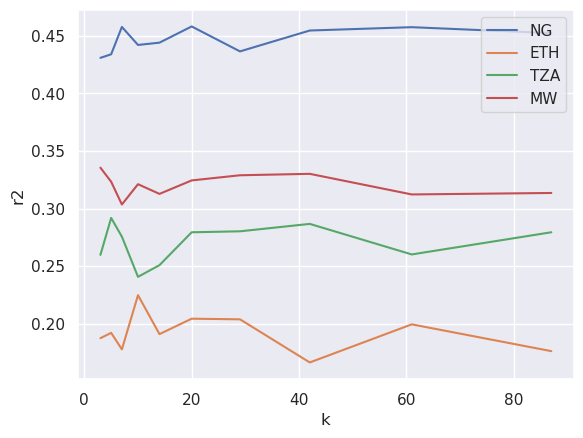

In [8]:
for country in countries :
    plt.plot(df['k'], df[country], label=country)
plt.xlabel('k')
plt.ylabel('r2')
plt.legend()

Text(0, 0.5, 'mean r2 for 4 countries')

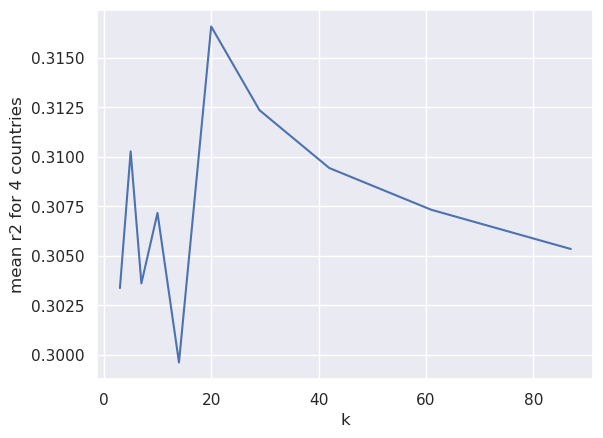

In [9]:
df2 = df[countries].mean(axis=1)
plt.plot(df['k'], df2)
plt.xlabel('k')
plt.ylabel('mean r2 for 4 countries')

In [10]:
display(df2)

1    0.303378
7    0.310273
5    0.303614
0    0.307168
6    0.299626
9    0.316574
8    0.312350
4    0.309433
3    0.307327
2    0.305348
dtype: float64